In [1]:
import sklearn as sl
import warnings

warnings.filterwarnings("ignore")

### Business Problem Definition

Let's create a predictive model that is able to predict whether or not a person can develop diabetes. For this, we will use historical patient data, available in the following dataset: http://archive.ics.uci.edu/ml/datasets/diabetes

This dataset describes the medical records among Pima Inidians patients and each record is marked whether the patient developed diabetes or not.

### Attribute information

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1)

### Data Extraction and Loading

In [2]:
import pandas as pd

file = 'aux/datasets/diabetes.csv'
columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(file, names = columns)

### Exploratory Data Analysis

### *Descriptive Statistics*

In [3]:
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Large datasets can take a long time to train the algorithm, and small ones may not have enough records to train the same.<br />
Many columns in your file can cause performance problems to the algorithm due to the high dimensionality.

The best solution will depend on each case. But remember: train your model in a subset of your larger dataset and then apply the model to new data.

**Dataset Dimensions**

In [4]:
data.shape

(768, 9)

**Attribute Data Type**

In [5]:
data.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

Sometimes it may be necessary convert data types, for example, when columns with integers represents categorical variables or ordinary values.

**Statistical Summary**

In [6]:
data.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Class Distribution**

In [7]:
data.groupby('class').size()

class
0    500
1    268
dtype: int64

In classification problems it may be necessary to balance the classes.<br />
Unbalanced classes (ie, greater volume of one of the class types) are common and need to be addressed during the pre-processing phase.<br /> We can see in the previous cell that there is a clear disproportion between classes 0 (non-occurrence of diabetes) and 1 (occurrence of diabetes).

**Pearson's Correlation**

In [8]:
data.corr(method = 'pearson')

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


The correlation is the relationship between 2 variables. The most common method for calculating correlation is the Pearson method, which assumes a normal data distribution.<br />Correlation range from -1 (negative correlation) to +1 (positive correlation). A correlation of 0 shows that there is no relationship between the variables.

Some algorithms, such as linear regression and logistic regression can present performance problems if there are highly correlated (collinear) attributes.

**Attribute Skew**

In [9]:
data.skew()

preg     0.901674
plas     0.173754
pres    -1.843608
skin     0.109372
test     2.272251
mass    -0.428982
pedi     1.919911
age      1.129597
class    0.635017
dtype: float64

Skew (or symmetry) refers to the distribution of data, that is assumed to be normal or Gaussian (bell curve).<br />
Many Machine Learning algorithms assume that the data has a normal distribution. Knowing the symmetry of the data, we can handle the same and deliver to the algorithm what it expects to receive, increasing the accuracy of the predictive model.

### *Matplotlib Visualization*

In [10]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 10]

**Univariate Histogram**

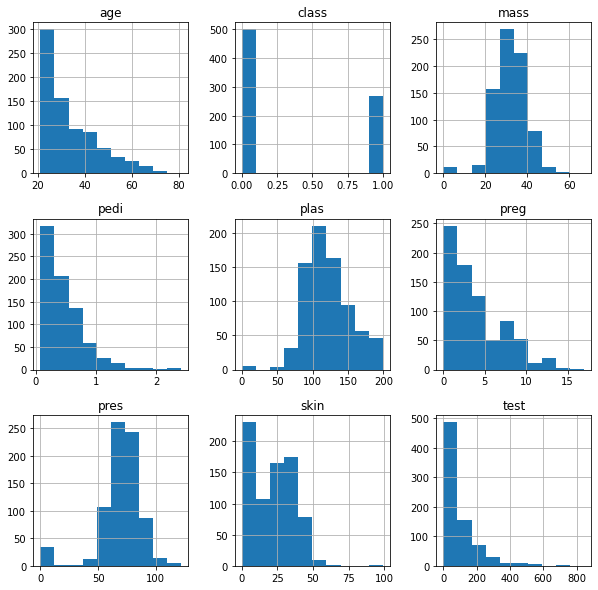

In [11]:
data.hist()
plt.show()

With the histogram we can quickly see the distribution of each attribute.<br />
Histograms group data into bins and provide a count of the number of observations in each bin. With the histogram, you can quickly check the symmetry of the data and whether it is in normal distribution or not. This will also help in identifying outliers.

We can see that the attributes age, pedi and test have an exponential distribution, and that the attributes mass and press have a normal distribution.

**Univariate Density Plot**

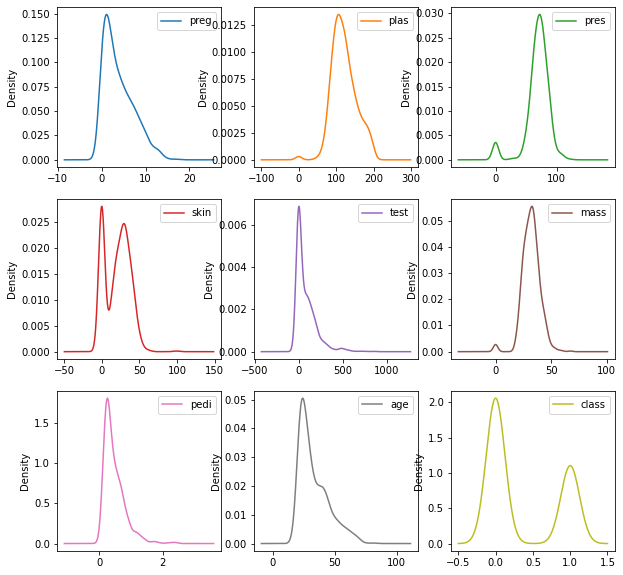

In [12]:
data.plot(kind = 'density', subplots = True, layout = (3, 3), sharex = False)
plt.show()

Density Plots are another way to visualize the distribution of data for each attribute.<br />
The plot is like a kind of abstract histogram with a smooth curve through the top of the bins of a histogram. It may be easier to identify the distribution of the data using a density plot.

**Box Plot**

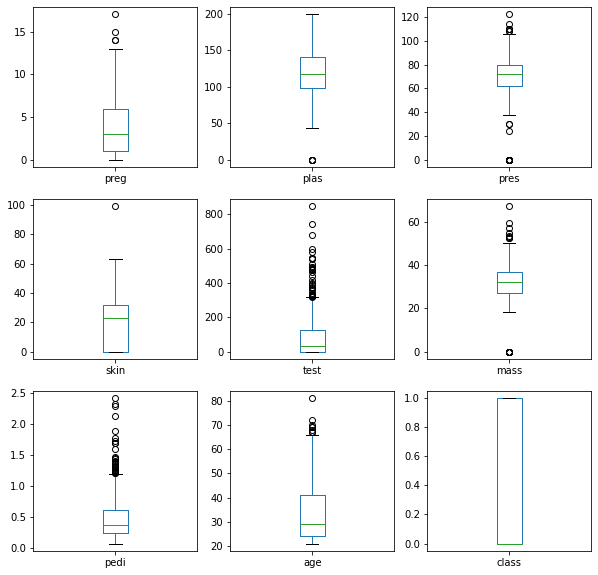

In [13]:
data.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False)
plt.show()

With boxplots we can also review the data distribution for each attribute<br />
The line in the center (green) is the median value (quartile 50%), the line below is the quartile 25% and the line above the quartile 75%.<br />
The boxplot helps to get an idea of the data dispersion and possible outliers.

We can see that the dispersion of the data is quite different among the attributes. The age, skin and test columns have a symmetry very close to smaller data values.

**Correlation Matrix (with variable names)**

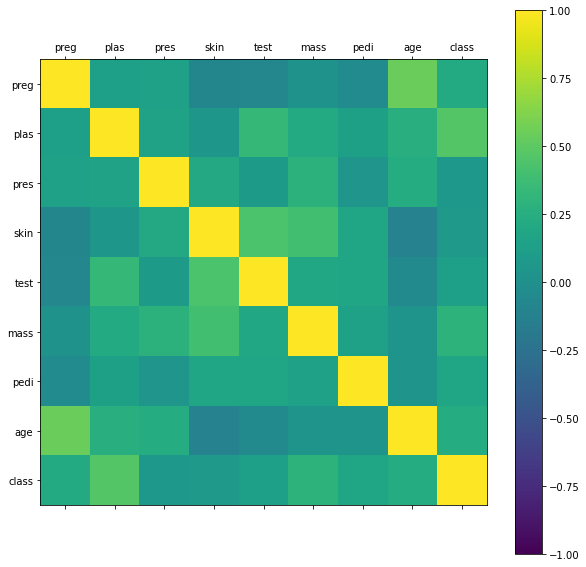

In [14]:
import numpy as np

correlations = data.corr()

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0, 9, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(columns)
ax.set_yticklabels(columns)
plt.show()

**Generic Correlation Matrix (without variable names)**

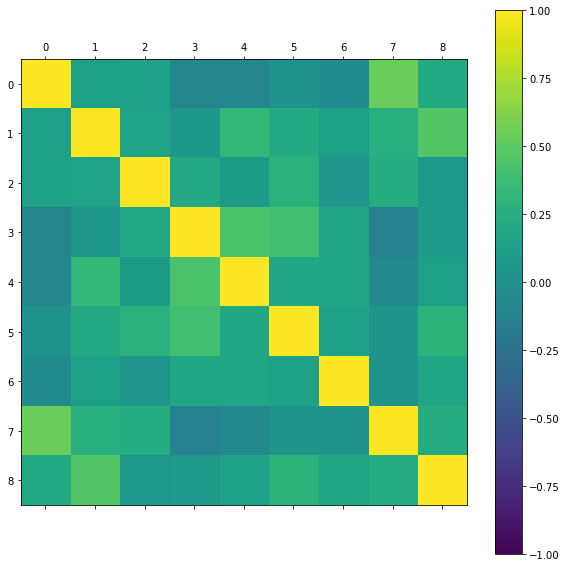

In [15]:
correlations = data.corr()

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
plt.show()

**Scatter Plot**

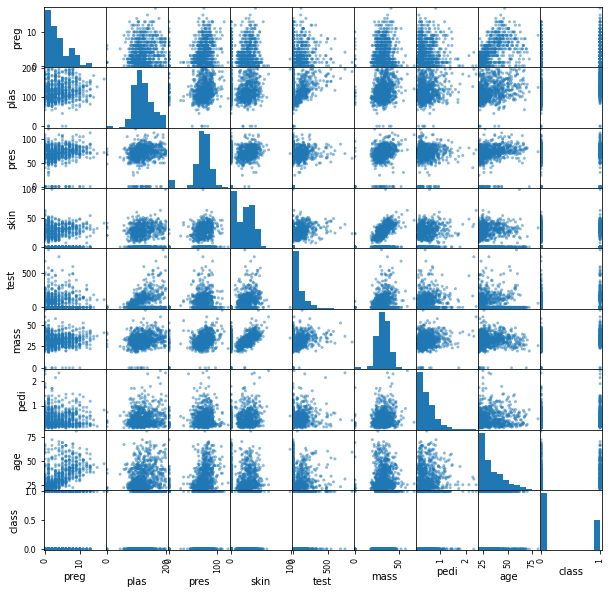

In [16]:
from pandas.plotting import scatter_matrix

scatter_matrix(data)
plt.show()

A scatterplot shows the relationship between two variables as points in two dimensions, with an axis for each variable. We can create a scatterplot for each pair of variables in our dataset.<br />
Like the correlation matrix, the scatterplot matrix is symmetric.

### *Seaborn Visualization*

In [17]:
import seaborn as sns

In [18]:
data.describe

<bound method NDFrame.describe of      preg  plas  pres  skin  test  mass   pedi  age  class
0       6   148    72    35     0  33.6  0.627   50      1
1       1    85    66    29     0  26.6  0.351   31      0
2       8   183    64     0     0  23.3  0.672   32      1
3       1    89    66    23    94  28.1  0.167   21      0
4       0   137    40    35   168  43.1  2.288   33      1
..    ...   ...   ...   ...   ...   ...    ...  ...    ...
763    10   101    76    48   180  32.9  0.171   63      0
764     2   122    70    27     0  36.8  0.340   27      0
765     5   121    72    23   112  26.2  0.245   30      0
766     1   126    60     0     0  30.1  0.349   47      1
767     1    93    70    31     0  30.4  0.315   23      0

[768 rows x 9 columns]>

**Pair Plot**

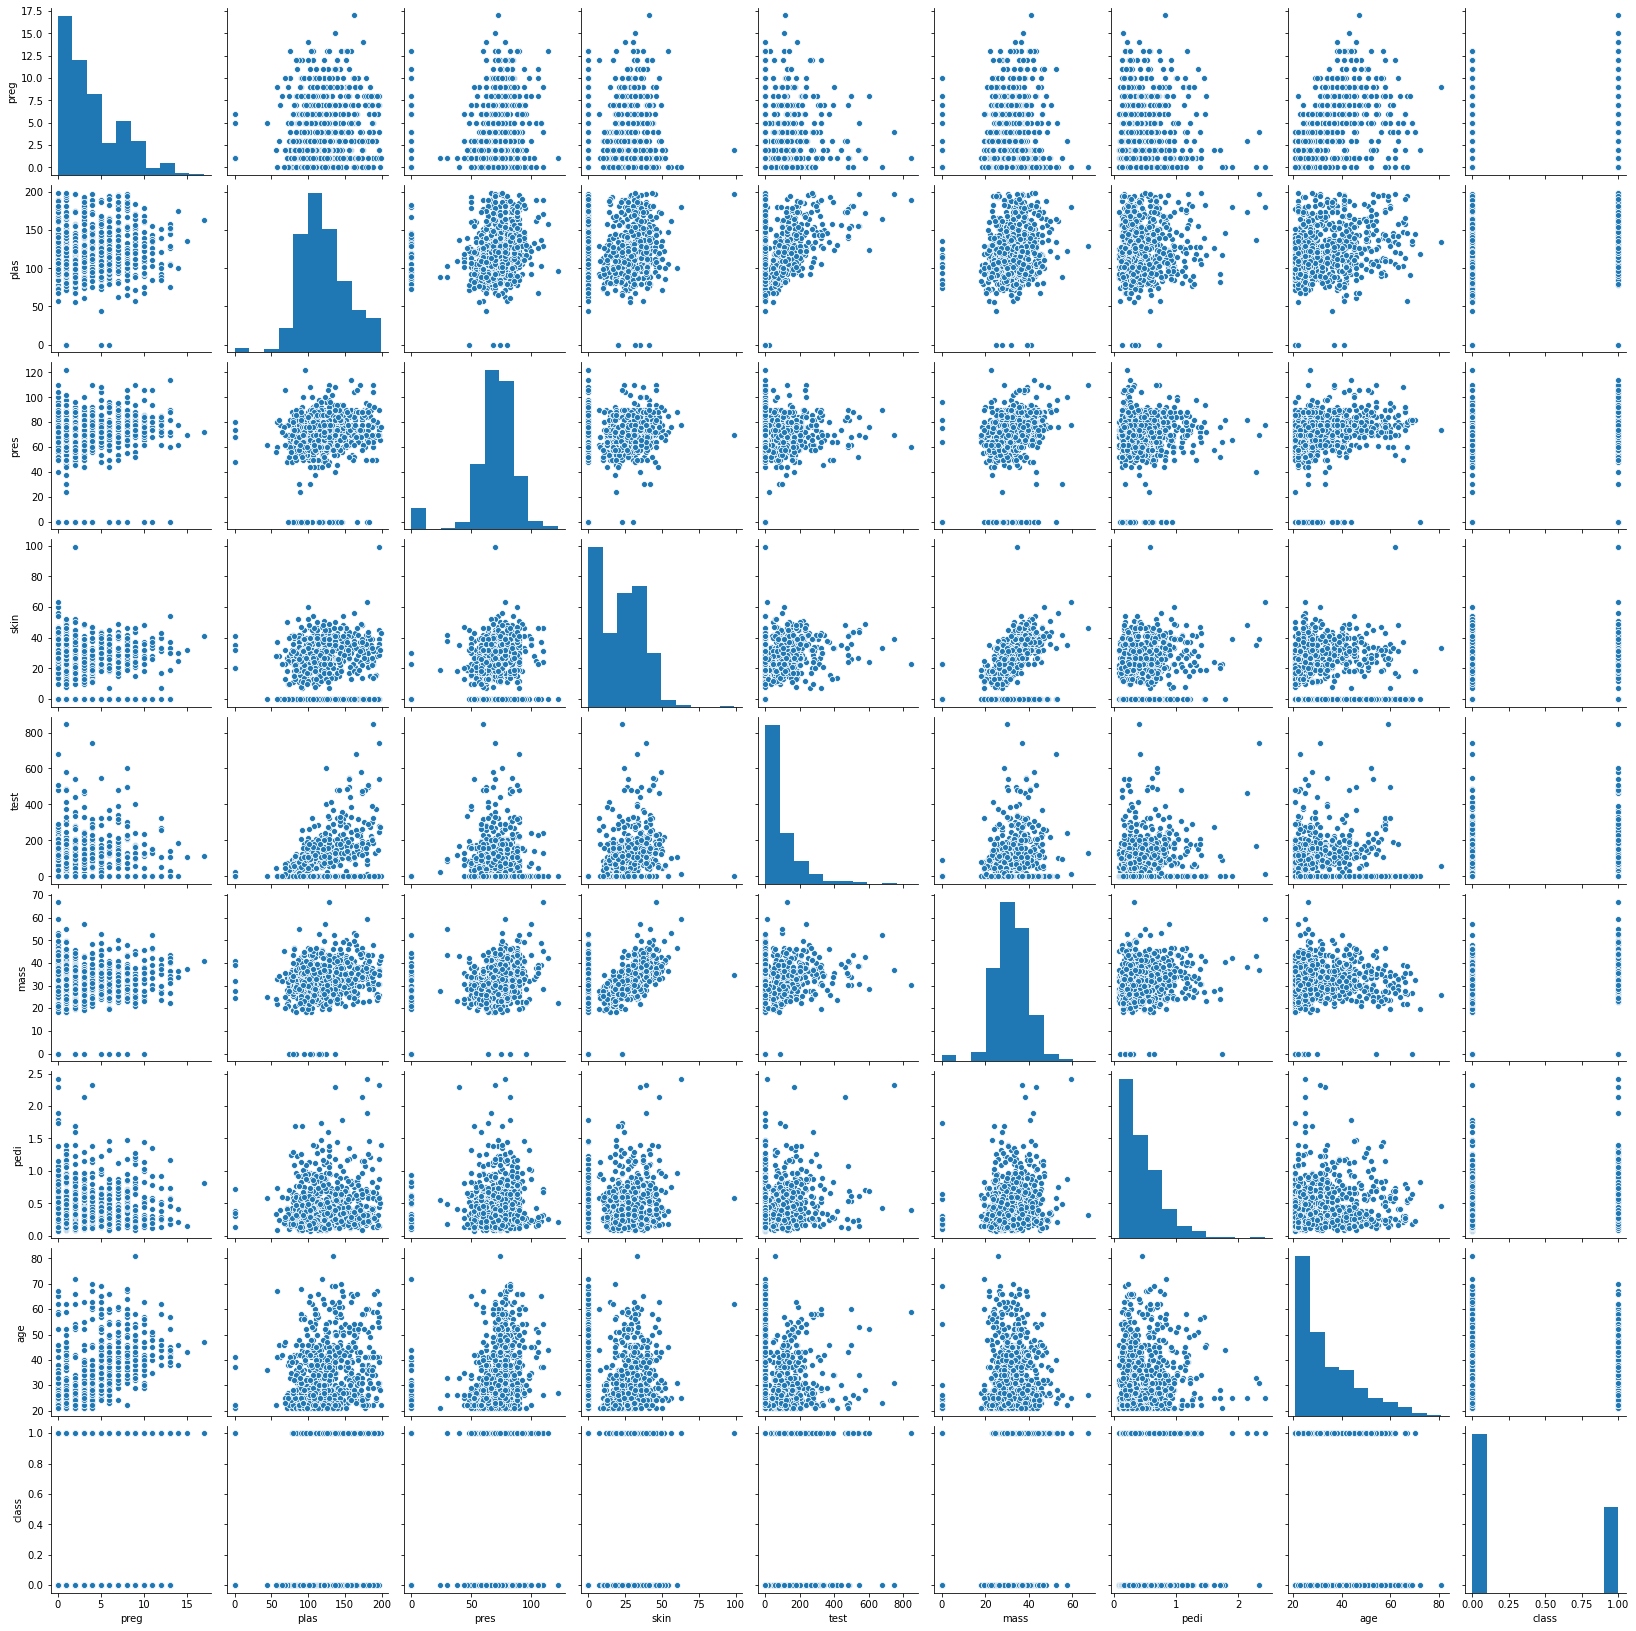

In [19]:
sns.pairplot(data);

**Boxplot with Vertical Orientation**

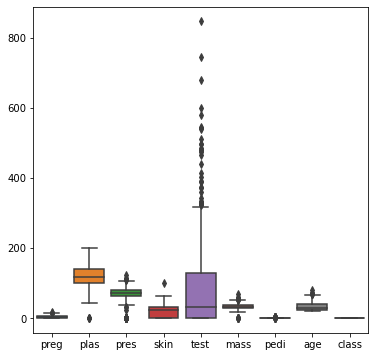

In [20]:
plt.figure(figsize = (6, 6))
sns.boxplot(data= data, orient = 'v');

**Cluster Map**

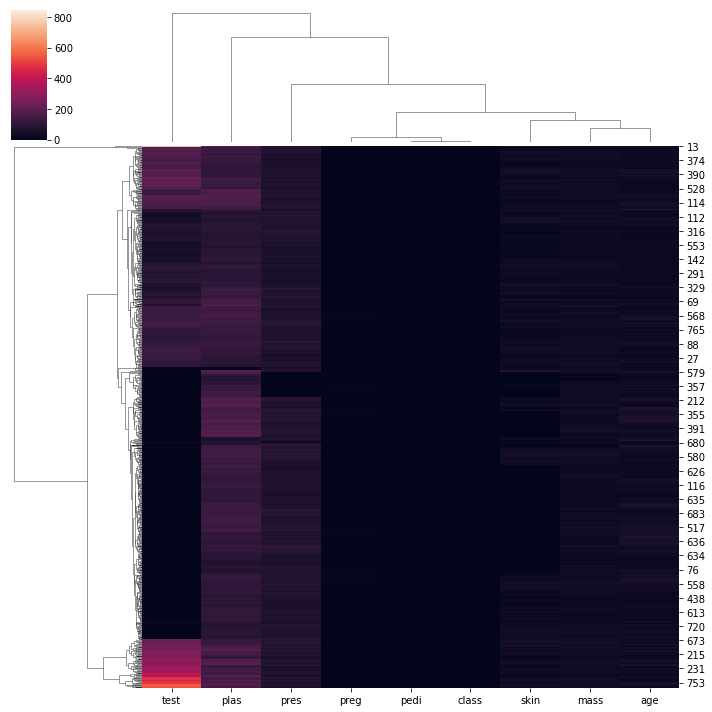

In [21]:
sns.clustermap(data);

**Dist Plot**

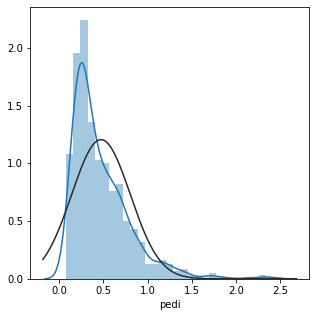

In [22]:
from scipy import stats

plt.figure(figsize = (5, 5))
sns.distplot(data.pedi, fit = stats.norm);

### Data Preparation for Machine Learning

Many algorithms expect to receive data in a specific format. It is your job to prepare the data in a structure that is suitable for the algorithm you are using.

It is very likely that you will have to perform pre-processing tasks on the data. This is a necessary step within the process. The challenge is the fact that each algorithm requires a different structure, which may require different transformations in the data. But it is possible in some cases to obtain good results without pre-processing work. But it is good practice to create different views and transformations of the data, so that you can test different Machine Learning algorithms.

### *Normalization - Method 1*

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

One of the first tasks within pre-processing is to put your data on the same scale. Many Machine Learning algorithms will benefit from this and produce better results. This step is also called normalization and means putting the data on a scale with a range between 0 and 1. This is useful for optimization, being used in the core of the Machine Learning algorithms, such as gradient descent. This is also useful for algorithms such as regression and neural networks and algorithms that use distance measurements, such as KNN.

In [23]:
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler

file = 'aux/datasets/diabetes.csv'
columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(file, names = columns)

# Split up inputs(x) and output(y)
x = data.values[:, 0:8]
y = data.values[:, 8]

# Normalize the data (creates the new scale)
scaler = MinMaxScaler(feature_range = (0, 1))
x_rescaled = scaler.fit_transform(x)

# Print the difference
print("Original Data:\n", data.values[:3, :])
print("\nNormalized Data:\n", x_rescaled[:3, :])

Original Data:
 [[  6.    148.     72.     35.      0.     33.6     0.627  50.      1.   ]
 [  1.     85.     66.     29.      0.     26.6     0.351  31.      0.   ]
 [  8.    183.     64.      0.      0.     23.3     0.672  32.      1.   ]]

Normalized Data:
 [[0.35294118 0.74371859 0.59016393 0.35353535 0.         0.50074516
  0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 0.29292929 0.         0.39642325
  0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 0.         0.         0.34724292
  0.25362938 0.18333333]]


### *Normalization - Method 2*

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html

In scikit-learn, normalization refers to adjusting the scale of each observation (line) so that it has a length of 1 (called a vector of length 1 in linear algebra). This pre-processing method is useful when we have sparse datasets (with many zeros) and attributes with a wide range of scales. Useful when using neural network algorithms or using distance measurement, such as KNN.

In [24]:
from pandas import read_csv
from sklearn.preprocessing import Normalizer

file = 'aux/datasets/diabetes.csv'
columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(file, names = columns)

# Split up inputs(x) and output(y)
x = data.values[:, 0:8]
y = data.values[:, 8]

# Normalize the data
scaler = Normalizer().fit(x)
x_rescaled = scaler.transform(x)

# Print the difference
print("Original Data:\n", data.values[:3, :])
print("\nNormalized Data:\n", x_rescaled[:3, :])

Original Data:
 [[  6.    148.     72.     35.      0.     33.6     0.627  50.      1.   ]
 [  1.     85.     66.     29.      0.     26.6     0.351  31.      0.   ]
 [  8.    183.     64.      0.      0.     23.3     0.672  32.      1.   ]]

Normalized Data:
 [[0.03355237 0.82762513 0.40262844 0.19572216 0.         0.18789327
  0.00350622 0.27960308]
 [0.008424   0.71604034 0.55598426 0.24429612 0.         0.22407851
  0.00295683 0.26114412]
 [0.04039768 0.92409698 0.32318146 0.         0.         0.11765825
  0.00339341 0.16159073]]


### *Standardization*

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

Standardization is the technique for transforming attributes with Gaussian distribution (normal) and different means and standard deviations into a Gaussian distribution with mean equal to 0 and standard deviation equal to 1. This is useful for algorithms that expect data to have a Gaussian distribution, such as linear regression, logistic regression and linear discriminant analysis. It works well when the data is already on the same scale.

In [25]:
from pandas import read_csv
from sklearn.preprocessing import StandardScaler

file = 'aux/datasets/diabetes.csv'
columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(file, names = columns)

# Split up inputs(x) and output(y)
x = data.values[:, 0:8]
y = data.values[:, 8]

# Standardize the data
scaler = StandardScaler().fit(x)
x_rescaled = scaler.transform(x)

# Print the difference
print("Original Data:\n", data.values[:3, :])
print("\nStandardized Data:\n", x_rescaled[:3, :])

Original Data:
 [[  6.    148.     72.     35.      0.     33.6     0.627  50.      1.   ]
 [  1.     85.     66.     29.      0.     26.6     0.351  31.      0.   ]
 [  8.    183.     64.      0.      0.     23.3     0.672  32.      1.   ]]

Standardized Data:
 [[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575  0.53090156 -0.69289057 -0.68442195
  -0.36506078 -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 -1.28821221 -0.69289057 -1.10325546
   0.60439732 -0.10558415]]


### *Binarization*

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Binarizer.html

We can define a value in our data, which we call a threshold and then we define that all values above the threshold will be marked as 1 and all values equal to or below the threshold will be marked as 0. This is what we call Binarization. This is useful when we have probabilities and we want to make the data more meaningful.

In [26]:
from pandas import read_csv
from sklearn.preprocessing import Binarizer

file = 'aux/datasets/diabetes.csv'
columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(file, names = columns)

# Split up inputs(x) and output(y)
x = data.values[:, 0:8]
y = data.values[:, 8]

# Binarize the data
scaler = Binarizer(threshold = 0.2).fit(x)
x_rescaled = scaler.transform(x)

# Print the difference
print("Original Data:\n", data.values[:3, :])
print("\nBinarized Data:\n", x_rescaled[:3, :])

Original Data:
 [[  6.    148.     72.     35.      0.     33.6     0.627  50.      1.   ]
 [  1.     85.     66.     29.      0.     26.6     0.351  31.      0.   ]
 [  8.    183.     64.      0.      0.     23.3     0.672  32.      1.   ]]

Binarized Data:
 [[1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]]


### Feature Selection

The attributes present in your dataset and which you use in the training data, will have a big influence on your predictive model accuracy and result. Irrelevant attributes will have a negative impact on performance, while collinear attributes can affect the model accuracy degree. Scikit-learn has functions that automate the work of extracting and selecting variables.

The Feature Selection step is where we select the attributes (variables) that will be the best candidates as predictor variables. Feature Selection helps us to reduce overfitting (when the algorithm learns too much), increases model accuracy and reduces training time.

### *Univariate Selection*

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

Statistical tests can be used to select the attributes that have a strong relationship with the variable we are trying to predict. Scikit-learn provides the SelectKBest() function that can be used with various statistical tests to select attributes. We will use the chi-square test and select the 4 best attributes that can be used as predictor variables.

In [27]:
from pandas import read_csv
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

file = 'aux/datasets/diabetes.csv'
columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(file, names = columns)

# Split up inputs(x) and output(y)
x = data.values[:, 0:8]
y = data.values[:, 8]

vars_test = SelectKBest(score_func = chi2, k = 4)
fit = vars_test.fit(x, y)
vars_selected = fit.transform(x)

print("Original Variables Number:", x.shape[1])
print("Reduced Variables Number:", vars_selected.shape[1])
print("Selected Variables:\n", vars_selected[:3, :])

Original Variables Number: 8
Reduced Variables Number: 4
Selected Variables:
 [[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]]


### *Recursive Feature Elimination (RFE)*

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

This is another technique for selecting attributes, which recursively removes the attributes and builds the model with the remaining attributes. This technique uses the model accuracy to identify the attributes that most contribute to predict the target variable.

The example below uses the technique of recursive elimination of attributes with a Logistic Regression algorithm to select the 3 best predictor variables. The RFE selected the "preg", "mass" and "pedi" variables, which are marked as True in "Selected Variables" and with a value of 1 in "Variable Ranking".

In [28]:
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

file = 'aux/datasets/diabetes.csv'
columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(file, names = columns)

# Split up inputs(x) and output(y)
x = data.values[:, 0:8]
y = data.values[:, 8]

model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(x, y)

print("Predictor Variables:", data.columns[0:8])
print("Selected Variables:", fit.support_)
print("Variable Ranking:", fit.ranking_)
print("Number of Best Attributes:", fit.n_features_)

Predictor Variables: Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'], dtype='object')
Selected Variables: [ True False False False False  True  True False]
Variable Ranking: [1 2 4 5 6 1 1 3]
Number of Best Attributes: 3


### *Ensemble Method*

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html

Bagged Decision Trees, like the RandomForest algorithm (these are called Ensemble Methods), can be used to estimate the importance of each attribute. This method returns a score for each attribute (the higher the score, the greater the importance of the attribute).

In [29]:
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier

file = 'aux/datasets/diabetes.csv'
columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(file, names = columns)

# Split up inputs(x) and output(y)
x = data.values[:, 0:8]
y = data.values[:, 8]

model = ExtraTreesClassifier()
model.fit(x, y)

print("Predictor Variables:\n", data.columns[0:8])
print("\nVariable Score:\n", model.feature_importances_)

Predictor Variables:
 Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'], dtype='object')

Variable Score:
 [0.11192103 0.23374939 0.09865099 0.08077801 0.07640317 0.13612887
 0.11889846 0.14347007]


### Dimension Reduction (Feature Extraction)

### *Principal Component Analysis (PCA)*

PCA was invented in 1901 by Karl Pearson and uses linear algebra to transform datasets into a compressed form, which is generally known as Dimensionality Reduction. With PCA you can choose the number of dimensions (called main components) in the transformed result. We will use PCA to select 3 main components.

In [30]:
from IPython.display import Image

Image(url = 'aux/images/pca-01.png')

PCA is a method for extracting important variables (in the form of components) from a large set of variables, available in a data set. This technique allows you to extract a small number of dimensional sets from a highly dimensional dataset. With fewer variables the visualization also becomes much more significant. PCA is most useful when dealing with 3 or more dimensions.

In [31]:
from IPython.display import Image

Image(url = 'aux/images/pca-02.png')

Each resulting component is a linear combination of n attributes. That is, each main component is a combination of attributes present in the dataset. The first principal component arrow is the linear combination of attributes with maximum variance and determines the direction in which there is the highest variability in the data. The greater the variability captured in the first principal component, the more information will be captured by the component. The second main component arrow captures the remaining variability. All subsequent components have the same concept.

The PCA needs to be fed with normalized data. Using the PCA on non-normalized data can generate unexpected results.

This is a technique of multivariate statistics that consists of transforming a set of original variables into another set of variables called principal components. The principal components have important properties: each principal component is a linear combination of all the original variables, they are independent of each other and are estimated with the purpose of retaining, in order of estimation, the maximum information in terms of the total variation contained in the data. The main components are guaranteed to be independent only if the data is normally distributed (together).

It seeks to redistribute the variation observed in the original axes in order to obtain a set of unrelated orthogonal axes. This technique can be used to generate indexes and groups of individuals. The analysis creates groups of individuals according to their variation, that is, individuals are grouped according to their variances. Their variance is their behavior within the population, represented by the variation of the set of characteristics that define the individual. That is, the technique creates groups of individuals of a population according to the variation of their characteristics.

PCA is associated with the idea of reducing data mass, with the least possible loss of information.

In [32]:
from IPython.display import Image

Image(url = 'aux/images/pca-03.png')

The goal is to summarize the data that contains many variables (p) by a smaller set of variable groups (k) derived from the original set. PCA uses a data set represented by an array of n records by p attributes, which can be correlated, and summarizes this set by uncorrelated axes (principal components) that are a linear combination of the original p variables. The first k components contain the largest amount of variation in the data.

In general terms, the PCA seeks to reduce the number of dimensions of a dataset, projecting the data on a new plane. Using this new projection, the original data, which can involve several variables, can be interpreted using fewer "dimensions."

In the reduced dataset we can see trends, patterns and/or outliers more clearly. But it's worth remembering that the rule: "If it's not in the raw data, it doesn't exist!" is always valid. The PCA provides only more clarity to the standards that are already there.

The greater the variance, the greater the amount of information contained in the component.

In [33]:
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

file = 'aux/datasets/diabetes.csv'
columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(file, names = columns)

# Split up inputs(x) and output(y)
x = data.values[:, 0:8]
y = data.values[:, 8]

# Normalize the data
scaler = MinMaxScaler(feature_range = (0, 1))
x_rescaled = scaler.fit_transform(x)

# Attribute selection
pca = PCA(n_components = 4)
fit = pca.fit(x_rescaled)

print("Variance:", fit.explained_variance_ratio_)
print("\nComponents:\n", fit.components_)

Variance: [0.31192249 0.21186663 0.11819693 0.10349153]

Components:
 [[ 0.65204425  0.24136132  0.22516492 -0.0559239  -0.00386329  0.0520263
   0.01915023  0.67798812]
 [-0.16932416  0.35676608  0.33104032  0.59815466  0.44736849  0.31942511
   0.26749398 -0.05428262]
 [ 0.24628749 -0.69388768  0.45574002  0.38484968 -0.1908919   0.12259645
  -0.19359513 -0.11447898]
 [ 0.51093814 -0.17502202 -0.66594541  0.34250382  0.23019001 -0.04263694
   0.24412554 -0.18197453]]


### Sampling - Resampling

You need to know if your predictive model will work well when you receive new data. The best way to evaluate the model's performance is to make predictions on data that you already know the result. Another way to test your model's performance is to use statistical techniques, such as sampling methods, that allow you to estimate the accuracy of your model at making predictions in new data.

The model evaluation is an estimate of how good the algorithm will be to predict in new data. This does not guarantee performance. After evaluating the model, we can retrain it with the training data and then prepare it for operational use in production. There are several techniques for this and we will study two here: Training and Test Data and Cross Validation.

### *Training and Test Data*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

This is the most used method to evaluate the performance of a Machine Learning algorithm. We split our original data into training and test data. We train the algorithm on the training data, make predictions on the test data and evaluate the result. The division of the data will depend on your dataset, but sizes between 70/30 (training/test) and 65/35 (training/test) are often used.

This method is very fast and ideal for very large datasets. The negative point is the possibility of high variance.

In [8]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings

warnings.filterwarnings("ignore")

file = 'aux/datasets/diabetes.csv'
columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(file, names = columns)

x = data.values[:, 0:8]
y = data.values[:, 8]

size = 0.33
seed = 7

x_training, x_test, y_training, y_test = train_test_split(x, y, test_size = size, random_state = seed)

model = LogisticRegression()
model.fit(x_training, y_training)

result = model.score(x_test, y_test)

print(f"Accuracy: {(result * 100)}%")

Accuracy: 78.74015748031496%


### *Cross Validation*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [17]:
from IPython.display import Image

Image(url = 'aux/images/cross-validation.jpg')

Cross Validation is a technique that can be used to evaluate the performance of a model with less variance than the technique of dividing data in training/testing. With this technique, we divide the data into parts usually called k-folds (for example k = 5, k = 10), and each part is called fold. The algorithm is trained in k-1 folds, and each fold is used in training repeatedly and one fold at a time. After executing the process in k-1 folds, we can summarize the performance in each fold using the average and standard deviation. The result is usually more reliable and offers greater accuracy to the model. The key to this process is to define the correct k value, so that the number of folds adequately represents the number of repetitions required.

In [10]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import warnings

warnings.filterwarnings("ignore")

file = 'aux/datasets/diabetes.csv'
columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(file, names = columns)

x = data.values[:, 0:8]
y = data.values[:, 8]

folds = 10
seed = 7

kfold = KFold(folds, True, random_state = seed)

model = LogisticRegression()

result = cross_val_score(model, x, y, cv = kfold)

print(f"Accuracy: {result.mean() * 100}%")

Accuracy: 77.86397812713604%


### Performance Evaluation

The metrics you choose to evaluate the model performance will influence how the performance is measured and compared to models created with other algorithms. We will use the same algorithm, but with different metrics and then compare the results. The function cross_validation.cross_val_score () will be used to evaluate the performance.

### *Metrics for Classification Algorithms*

https://scikit-learn.org/stable/modules/model_evaluation.html

**Accuracy**<br />
Number of correct predictions, it is useful only when there is the same number of observations in each class.

In [12]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import warnings

warnings.filterwarnings("ignore")

file = 'aux/datasets/diabetes.csv'
columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(file, names = columns)

x = data.values[:, 0:8]
y = data.values[:, 8]

folds = 10
seed = 7

kfold = KFold(folds, True, random_state = seed)

model = LogisticRegression()

result = cross_val_score(model, x, y, cv = kfold, scoring = 'accuracy')

print(f"Accuracy: {result.mean() * 100}%")

Accuracy: 77.86397812713604%


**ROC Curve**<br />
The ROC Curve allows analyzing the AUC (Area Under the Curve) metric. This is a performance metric for binary classification, in which we can define the classes in positive and negative.<br />
Binary classification problems are a trade-off between Sensitivity and Specifity, Sensitivity being the rate of true positives (TP - number of positive instances of the first class that were correctly predicted) and Specifity the rate of true negatives (TN - number of instances of the second class that were correctly predicted).<br />
Values above 0.5 indicate a good forecast rate.

In [13]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import warnings

warnings.filterwarnings("ignore")

file = 'aux/datasets/diabetes.csv'
columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(file, names = columns)

x = data.values[:, 0:8]
y = data.values[:, 8]

folds = 10
seed = 7

kfold = KFold(folds, True, random_state = seed)

model = LogisticRegression()

result = cross_val_score(model, x, y, cv = kfold, scoring = 'roc_auc')

print(f"AUC: {result.mean() * 100}%")

AUC: 82.47510276727816%


**Confusion Matrix**<br />
Allows checking the accuracy in a table format.

In [14]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import warnings

warnings.filterwarnings("ignore")

file = 'aux/datasets/diabetes.csv'
columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(file, names = columns)

x = data.values[:, 0:8]
y = data.values[:, 8]

size = 0.33
seed = 7

x_training, x_test, y_training, y_test = train_test_split(x, y, test_size = size, random_state = seed)

model = LogisticRegression()
model.fit(x_training, y_training)

predictions = model.predict(x_test)
matrix = confusion_matrix(y_test, predictions)

print(f"Confusion Matrix:\n{matrix}")

Confusion Matrix:
[[142  20]
 [ 34  58]]


**Classification Report**

In [15]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import warnings

warnings.filterwarnings("ignore")

file = 'aux/datasets/diabetes.csv'
columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(file, names = columns)

x = data.values[:, 0:8]
y = data.values[:, 8]

size = 0.33
seed = 7

x_training, x_test, y_training, y_test = train_test_split(x, y, test_size = size, random_state = seed)

model = LogisticRegression()
model.fit(x_training, y_training)

predictions = model.predict(x_test)
report = classification_report(y_test, predictions)

print(f"Classification Report:\n{report}")

Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84       162
         1.0       0.74      0.63      0.68        92

    accuracy                           0.79       254
   macro avg       0.78      0.75      0.76       254
weighted avg       0.78      0.79      0.78       254



### Classification Algorithms

We can't know which algorithm will build the best model, before testing them with our dataset. The ideal is to test some algorithms, and then choose the one that provides the best level of accuracy. We will test a set of classification algorithms, under the same conditions.

### *Logistic Regression*

Linear Algorithm. The Logistic Regression algorithm assumes that your data is in a normal distribution for numerical values that can be modeled with binary classification.

In [31]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import warnings

warnings.filterwarnings("ignore")

file = 'aux/datasets/diabetes.csv'
columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(file, names = columns)

x = data.values[:, 0:8]
y = data.values[:, 8]

folds = 10
seed = 7

kfold = KFold(folds, True, random_state = seed)

model = LogisticRegression()

result = cross_val_score(model, x, y, cv = kfold)

print(f"Accuracy: {result.mean() * 100}%")

Accuracy: 77.86397812713604%


### *Linear Discriminant Analysis*

Linear Algorithm. It is a statistical technique for binary classification, and it also assumes that the data is in normal distribution.

In [30]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import warnings

warnings.filterwarnings("ignore")

file = 'aux/datasets/diabetes.csv'
columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(file, names = columns)

x = data.values[:, 0:8]
y = data.values[:, 8]

folds = 10
seed = 7

kfold = KFold(folds, True, random_state = seed)

model = LinearDiscriminantAnalysis()

result = cross_val_score(model, x, y, cv = kfold)

print(f"Accuracy: {result.mean() * 100}%")

Accuracy: 76.69685577580316%


### *KNN - K-Nearest Neighbors*

Non-Linear Algorithm. It uses a distance metric to find the most appropriate K value for the training dataset instances.

In [29]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import warnings

warnings.filterwarnings("ignore")

file = 'aux/datasets/diabetes.csv'
columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(file, names = columns)

x = data.values[:, 0:8]
y = data.values[:, 8]

folds = 10
seed = 7

kfold = KFold(folds, True, random_state = seed)

model = KNeighborsClassifier()

result = cross_val_score(model, x, y, cv = kfold)

print(f"Accuracy: {result.mean() * 100}%")

Accuracy: 71.09876965140123%


### *Naive Bayes*

Non-Linear Algorithm. Calculates the probability of each class, and the conditional probability of each class given an input variable. The probabilities are then estimated for the new data and multiplied, assuming they are independent (simple assumption or Naive). It also assumes that the data is in normal distribution.

In [28]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
import warnings

warnings.filterwarnings("ignore")

file = 'aux/datasets/diabetes.csv'
columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(file, names = columns)

x = data.values[:, 0:8]
y = data.values[:, 8]

folds = 10
seed = 7

kfold = KFold(folds, True, random_state = seed)

model = GaussianNB()

result = cross_val_score(model, x, y, cv = kfold)

print(f"Accuracy: {result.mean() * 100}%")

Accuracy: 75.91421736158578%


### *CART - Classification and Regression Trees*

Non-Linear Algorithm. The CART algorithm builds a binary tree from the training dataset. Each attribute and its value are evaluated in order to reduce the Cost Function.

In [26]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import warnings

warnings.filterwarnings("ignore")

file = 'aux/datasets/diabetes.csv'
columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(file, names = columns)

x = data.values[:, 0:8]
y = data.values[:, 8]

folds = 10
seed = 7

kfold = KFold(folds, True, random_state = seed)

model = DecisionTreeClassifier()

result = cross_val_score(model, x, y, cv = kfold)

print(f"Accuracy: {result.mean() * 100}%")

Accuracy: 70.19651401230348%


### *SVM - Support Vector Machines*

The purpose of this algorithm is to search for a line that best separates two classes within a dataset. The data instances that are closest to this line are called support vectors. SVM has been extended to support multiclass.

Support Vector Machines are very powerful sorting algorithms. When used in conjunction with "Random Forest" and other machine learning tools, they give a very different dimension for the model building. Thus, they become crucial for cases where very it's required a high predictive power. These algorithms are a little more difficult to visualize due to the formulation complexity.

In [27]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import warnings

warnings.filterwarnings("ignore")

file = 'aux/datasets/diabetes.csv'
columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(file, names = columns)

x = data.values[:, 0:8]
y = data.values[:, 8]

folds = 10
seed = 7

kfold = KFold(folds, True, random_state = seed)

model = SVC()

result = cross_val_score(model, x, y, cv = kfold)

print(f"Accuracy: {result.mean() * 100}%")

Accuracy: 76.04579630895421%
